This notebook demonstrates the functionality of CCL in the mu / Sigma parametrization of modified gravity.

In [1]:
import pyccl as ccl
import numpy as np
import matplotlib.pyplot as plt



First set some default cosmological parameters.


In [2]:
Omega_c = 0.25; Omega_b = 0.05; h = 0.7; A_s = 2.1e-9;
n_s = 0.96; Neff = 3.046; m_nu = 0.

Set up some different mu_0 / Sigma_0 pairs.

In [3]:
mu_0 = [0.3, -0.3, 0.3, -0.3]
sigma_0 = [0.3, -0.3, -0.3, -0.3]

Set up the cosmology objects, including one where mu_0 = sigma_0 = 0, the GR case, but using two methods. The first is using camb with a matter power spectrum that is rescalled for MG using the growth factor squared. The second uses CCL internal calls to isitgr with the MG parameters specified so the MG power spectrum is calculated. Only linear scales are supported for the mu / Sigma parameterisation. 

In [4]:
cosmo_GR_R = ccl.Cosmology(Omega_c = Omega_c, Omega_b = Omega_b,
                         h = h, A_s = A_s, n_s = n_s, Neff = Neff,
                         m_nu = m_nu, matter_power_spectrum='linear',transfer_function='boltzmann_camb')

cosmo_1_R = ccl.Cosmology(Omega_c = Omega_c, Omega_b = Omega_b, 
                        h = h, A_s = A_s, n_s = n_s, Neff = Neff,
                        m_nu = m_nu, mu_0 = mu_0[0], sigma_0 = sigma_0[0],
                        matter_power_spectrum='linear',transfer_function='boltzmann_camb')

cosmo_2_R = ccl.Cosmology(Omega_c = Omega_c, Omega_b = Omega_b, h = h,
                        A_s = A_s, n_s = n_s, Neff = Neff,
                        m_nu = m_nu, mu_0 = mu_0[3], sigma_0 = sigma_0[3], 
                        matter_power_spectrum='linear',transfer_function='boltzmann_camb')

cosmo_GR_I = ccl.Cosmology(Omega_c = Omega_c, Omega_b = Omega_b,
                         h = h, A_s = A_s, n_s = n_s, Neff = Neff,
                         m_nu = m_nu, matter_power_spectrum='linear',transfer_function='boltzmann_isitgr')

cosmo_1_I = ccl.Cosmology(Omega_c = Omega_c, Omega_b = Omega_b, 
                        h = h, A_s = A_s, n_s = n_s, Neff = Neff,
                        m_nu = m_nu, mu_0 = mu_0[0], sigma_0 = sigma_0[0],
                        matter_power_spectrum='linear',transfer_function='boltzmann_isitgr')

cosmo_2_I = ccl.Cosmology(Omega_c = Omega_c, Omega_b = Omega_b, h = h,
                        A_s = A_s, n_s = n_s, Neff = Neff,
                        m_nu = m_nu, mu_0 = mu_0[3], sigma_0 = sigma_0[3], 
                        matter_power_spectrum='linear',transfer_function='boltzmann_isitgr')



Compute the growth factors (unnormalized so our intuition wrt GR will be correct).

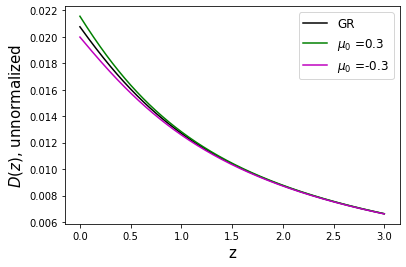

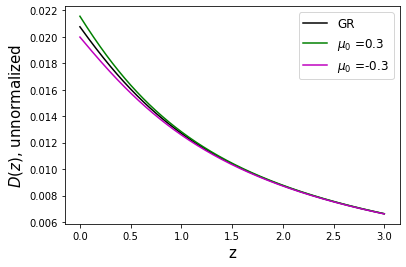

In [5]:
z = np.linspace(0., 3., 600)
a = 1. / (1. + z)

# We only plot models 1 and 2 because the growth factor 
# is unaffected by Sigma, so 3 and 4 are res
D_GR_R = ccl.growth_factor_unnorm(cosmo_GR_R, a)
D_1_R = ccl.growth_factor_unnorm(cosmo_1_R, a)
D_2_R = ccl.growth_factor_unnorm(cosmo_2_R, a)

D_GR_I = ccl.growth_factor_unnorm(cosmo_GR_R, a)
D_1_I = ccl.growth_factor_unnorm(cosmo_1_R, a)
D_2_I = ccl.growth_factor_unnorm(cosmo_2_R, a)

plt.figure()
plt.plot(z, D_GR_R, 'k', label='GR')
plt.plot(z, D_1_R, 'g', label='$\mu_0$ ='+str(mu_0[0]))
plt.plot(z, D_2_R, 'm', label='$\mu_0$ ='+str(mu_0[1]))
plt.xlabel('z', fontsize=15)
plt.ylabel('$D(z)$, unnormalized', fontsize=15)
plt.legend(fontsize=12)
plt.show()

plt.figure()
plt.plot(z, D_GR_I, 'k', label='GR')
plt.plot(z, D_1_I, 'g', label='$\mu_0$ ='+str(mu_0[0]))
plt.plot(z, D_2_I, 'm', label='$\mu_0$ ='+str(mu_0[1]))
plt.xlabel('z', fontsize=15)
plt.ylabel('$D(z)$, unnormalized', fontsize=15)
plt.legend(fontsize=12)
plt.show()

Compute the linear matter power spectrum (support for this parameterisation is limited to the linear regime). Again, the matter power spectrum is only affected by $\mu_0$, not $\Sigma_0$.

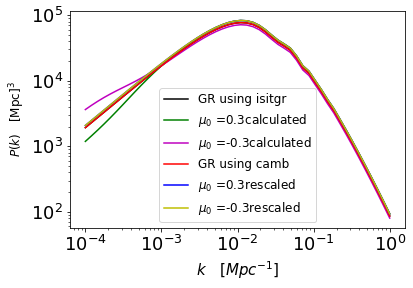

In [6]:
k = np.logspace(-4, 0) # 1 / Mpc units

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

Pk_GR_I = ccl.linear_matter_power(cosmo_GR_I, k, a=1.)
Pk_1_I = ccl.linear_matter_power(cosmo_1_I, k, a=1.)
Pk_2_I = ccl.linear_matter_power(cosmo_2_I, k, a=1.)
Pk_GR_R = ccl.linear_matter_power(cosmo_GR_R, k, a=1.)
Pk_1_R = ccl.linear_matter_power(cosmo_1_R, k, a=1.)
Pk_2_R = ccl.linear_matter_power(cosmo_2_R, k, a=1.)

plt.loglog(k, Pk_GR_I, 'k', label='GR using isitgr')

plt.loglog(k, Pk_1_I, 'g', label='$\mu_0$ ='+str(mu_0[0])+'calculated')

plt.loglog(k, Pk_2_I, 'm', label='$\mu_0$ ='+str(mu_0[3])+'calculated')

plt.loglog(k, Pk_GR_R, 'r', label='GR using camb')

plt.loglog(k, Pk_1_R, 'b', label='$\mu_0$ ='+str(mu_0[0])+ 'rescaled')
           
plt.loglog(k, Pk_1_R, 'y', label='$\mu_0$ ='+str(mu_0[3])+'rescaled')         

plt.xlabel('$k\quad[Mpc^{-1}]$', fontsize = 15)
plt.ylabel('$P(k)\quad[{\\rm Mpc}]^3$', fontsize=12)
plt.legend(fontsize=12)
plt.show()

And in real space, get the 3D correlation function of matter, $\xi(r)$.

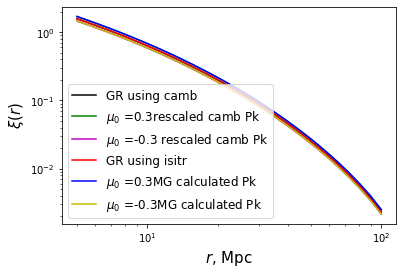

In [16]:
r = np.logspace(np.log10(5), np.log10(100), 30) # Mpc

corr_GR_R = ccl.correlation_3d(cosmo_GR_R, a=1., r=r)
corr_1_R = ccl.correlation_3d(cosmo_1_R, a=1., r=r)
corr_2_R = ccl.correlation_3d(cosmo_2_R, a=1., r=r)

corr_GR_I = ccl.correlation_3d(cosmo_GR_I, a=1., r=r)
corr_1_I = ccl.correlation_3d(cosmo_1_I, a=1., r=r)
corr_2_I = ccl.correlation_3d(cosmo_2_I, a=1., r=r)

plt.figure()
plt.loglog(r, corr_GR_R, 'k', label='GR using camb')
plt.loglog(r, corr_1_R, 'g', label='$\mu_0$ ='+str(mu_0[0])+"rescaled")
plt.loglog(r, corr_2_R, 'm', label='$\mu_0$ ='+str(mu_0[3])+" rescaled")

plt.loglog(r, corr_GR_I, 'r', label='GR using isitr')
plt.loglog(r, corr_1_I, 'b', label='$\mu_0$ ='+str(mu_0[0])+"calculated")
plt.loglog(r, corr_2_I, 'y', label='$\mu_0$ ='+str(mu_0[3])+"calculated")

plt.xlabel('$r$, Mpc', fontsize = 15)
plt.ylabel('$\\xi(r)$', fontsize=15)
plt.legend(fontsize=12)
plt.show()

Compute the lensing $C_\ell$ values. We need some redshift distributions.

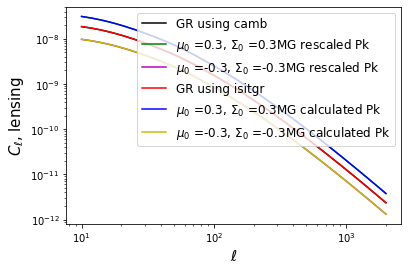

In [17]:
# Number density input
n = np.exp(-((z-0.5)/0.1)**2)
        
# ell range input
ell = np.arange(10, 2000)
     
# ClTracer objects

lens_GR_R = ccl.WeakLensingTracer(cosmo_GR_R, dndz=(z,n))
lens_1_R = ccl.WeakLensingTracer(cosmo_1_R, dndz=(z,n))
lens_2_R = ccl.WeakLensingTracer(cosmo_2_R, dndz=(z,n))

lens_GR_I = ccl.WeakLensingTracer(cosmo_GR_I, dndz=(z,n))
lens_1_I = ccl.WeakLensingTracer(cosmo_1_I, dndz=(z,n))
lens_2_I = ccl.WeakLensingTracer(cosmo_2_I, dndz=(z,n))

Cl_lensing_GR_R = ccl.angular_cl(cosmo_GR_R, lens_GR_R, lens_GR_R, ell)
Cl_lensing_1_R = ccl.angular_cl(cosmo_1_R, lens_1_R, lens_1_R, ell)
Cl_lensing_2_R = ccl.angular_cl(cosmo_2_R, lens_2_R, lens_2_R, ell)

Cl_lensing_GR_I = ccl.angular_cl(cosmo_GR_I, lens_GR_I, lens_GR_I, ell)
Cl_lensing_1_I = ccl.angular_cl(cosmo_1_I, lens_1_I, lens_1_I, ell)
Cl_lensing_2_I = ccl.angular_cl(cosmo_2_I, lens_2_I, lens_2_I, ell)


plt.figure()
plt.loglog(ell, Cl_lensing_GR_R, 'k', label='GR using camb')
plt.loglog(ell, Cl_lensing_1_R, 'g', 
           label='$\mu_0$ ='+str(mu_0[0])+', $\Sigma_0$ =' + str(sigma_0[0])+ 'rescaled')
plt.loglog(ell, Cl_lensing_2_R, 'm', 
           label='$\mu_0$ ='+str(mu_0[3])+', $\Sigma_0$ =' + str(sigma_0[3])+'rescaled')

plt.loglog(ell, Cl_lensing_GR_I, 'r', label='GR using isitgr')
plt.loglog(ell, Cl_lensing_1_I, 'b', 
           label='$\mu_0$ ='+str(mu_0[0])+', $\Sigma_0$ =' + str(sigma_0[0])+ 'calculated')
plt.loglog(ell, Cl_lensing_2_I, 'y', 
           label='$\mu_0$ ='+str(mu_0[3])+', $\Sigma_0$ =' + str(sigma_0[3])+ 'calculated')

plt.xlabel('$\ell$', fontsize=15)
plt.ylabel('$C_\ell$, lensing', fontsize=15)
plt.legend(fontsize=12)
plt.show()

Compute the galaxy clustering $C_\ell$ values. With magnification turned off, this is independent of $\Sigma_0$.

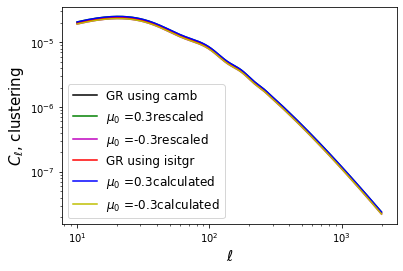

In [18]:
# Bias input
b = np.sqrt(1. + z)

# ClTracer objects
nc_GR_R = ccl.NumberCountsTracer(cosmo_GR_R, has_rsd=False, dndz=(z,n), bias=(z,b))
nc_1_R = ccl.NumberCountsTracer(cosmo_1_R, has_rsd=False, dndz=(z,n), bias=(z,b))
nc_2_R = ccl.NumberCountsTracer(cosmo_2_R, has_rsd=False, dndz=(z,n), bias=(z,b))

Cl_nc_GR_R = ccl.angular_cl(cosmo_GR_R, nc_GR_R, nc_GR_R, ell)
Cl_nc_1_R = ccl.angular_cl(cosmo_1_R, nc_1_R, nc_1_R, ell)
Cl_nc_2_R = ccl.angular_cl(cosmo_2_R, nc_2_R, nc_2_R, ell)

nc_GR_I = ccl.NumberCountsTracer(cosmo_GR_I, has_rsd=False, dndz=(z,n), bias=(z,b))
nc_1_I = ccl.NumberCountsTracer(cosmo_1_I, has_rsd=False, dndz=(z,n), bias=(z,b))
nc_2_I = ccl.NumberCountsTracer(cosmo_2_I, has_rsd=False, dndz=(z,n), bias=(z,b))

Cl_nc_GR_I = ccl.angular_cl(cosmo_GR_I, nc_GR_I, nc_GR_I, ell)
Cl_nc_1_I = ccl.angular_cl(cosmo_1_I, nc_1_I, nc_1_I, ell)
Cl_nc_2_I = ccl.angular_cl(cosmo_2_I, nc_2_I, nc_2_I, ell)

plt.figure()
plt.loglog(ell, Cl_nc_GR_R, 'k', label='GR using camb')
plt.loglog(ell, Cl_nc_1_R, 'g', label='$\mu_0$ ='+str(mu_0[0])+"rescaled")
plt.loglog(ell, Cl_nc_2_R, 'm', label='$\mu_0$ ='+str(mu_0[3])+"rescaled")
plt.loglog(ell, Cl_nc_GR_I, 'r', label='GR using isitgr')
plt.loglog(ell, Cl_nc_1_I, 'b', label='$\mu_0$ ='+str(mu_0[0])+"calculated")
plt.loglog(ell, Cl_nc_2_I, 'y', label='$\mu_0$ ='+str(mu_0[3])+"calculated")

plt.xlabel('$\ell$', fontsize=15)
plt.ylabel('$C_\ell$, clustering', fontsize=15)
plt.legend(fontsize=12)
plt.show()

Compute the $C_\ell$ for the CMB lensing.

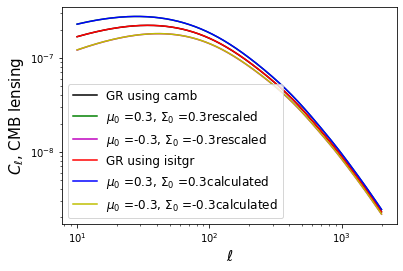

In [20]:
# Cl Tracer objects
cmbl_GR_R = ccl.CMBLensingTracer(cosmo_GR_R,1089.)
cmbl_1_R = ccl.CMBLensingTracer(cosmo_1_R,1089.)
cmbl_2_R = ccl.CMBLensingTracer(cosmo_2_R,1089.)

cmbl_GR_I = ccl.CMBLensingTracer(cosmo_GR_I,1089.)
cmbl_1_I = ccl.CMBLensingTracer(cosmo_1_I,1089.)
cmbl_2_I = ccl.CMBLensingTracer(cosmo_2_I,1089.)

Cl_cmb_GR_R = ccl.angular_cl(cosmo_GR_R, cmbl_GR_R, cmbl_GR_R, ell)
Cl_cmb_1_R = ccl.angular_cl(cosmo_1_R, cmbl_1_R, cmbl_1_R, ell)
Cl_cmb_2_R = ccl.angular_cl(cosmo_2_R, cmbl_2_R, cmbl_2_R, ell)

Cl_cmb_GR_I = ccl.angular_cl(cosmo_GR_I, cmbl_GR_I, cmbl_GR_I, ell)
Cl_cmb_1_I = ccl.angular_cl(cosmo_1_I, cmbl_1_I, cmbl_1_I, ell)
Cl_cmb_2_I = ccl.angular_cl(cosmo_2_I, cmbl_2_I, cmbl_2_I, ell)

plt.figure()
plt.loglog(ell, Cl_cmb_GR_R, 'k', label='GR using camb')
plt.loglog(ell, Cl_cmb_1_R, 'g', 
           label='$\mu_0$ ='+str(mu_0[0])+', $\Sigma_0$ =' + str(sigma_0[0])+"rescaled")
plt.loglog(ell, Cl_cmb_2_R, 'm', 
           label='$\mu_0$ ='+str(mu_0[3])+', $\Sigma_0$ =' + str(sigma_0[3])+"rescaled")

plt.loglog(ell, Cl_cmb_GR_I, 'r', label='GR using isitgr')
plt.loglog(ell, Cl_cmb_1_I, 'b', 
           label='$\mu_0$ ='+str(mu_0[0])+', $\Sigma_0$ =' + str(sigma_0[0])+"calculated")
plt.loglog(ell, Cl_cmb_2_I, 'y', 
           label='$\mu_0$ ='+str(mu_0[3])+', $\Sigma_0$ =' + str(sigma_0[3])+"calculated")

plt.xlabel('$\ell$', fontsize=15)
plt.ylabel('$C_\ell$, CMB lensing', fontsize=15)
plt.legend(fontsize=12)
plt.show()

Now compute the 2D correlation functions for each of these cases.

Lensing first ($\xi_+$ and $\xi_-$):

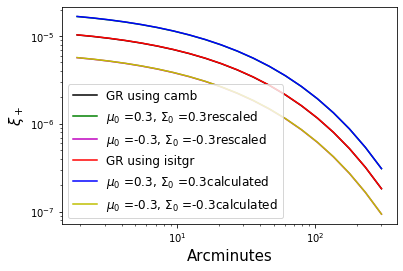

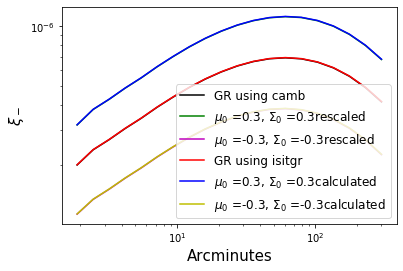

In [22]:


theta = np.logspace(-1.5, np.log10(5), 20) # In degrees

xi_p_GR_R = ccl.correlation(cosmo_GR_R, ell, Cl_lensing_GR_R, theta, 
                          corr_type='L+', method='fftlog')
xi_p_1_R = ccl.correlation(cosmo_1_R, ell, Cl_lensing_1_R, theta, 
                          corr_type='L+', method='fftlog')
xi_p_2_R = ccl.correlation(cosmo_2_R, ell, Cl_lensing_2_R, theta, 
                          corr_type='L+', method='fftlog')


xi_m_GR_R = ccl.correlation(cosmo_GR_R, ell, Cl_lensing_GR_R, theta,
                         corr_type='L-', method='fftlog')
xi_m_1_R = ccl.correlation(cosmo_1_R, ell, Cl_lensing_1_R, theta,
                         corr_type='L-', method='fftlog')
xi_m_2_R = ccl.correlation(cosmo_2_R, ell, Cl_lensing_2_R, theta, 
                         corr_type='L-', method='fftlog')

xi_p_GR_I = ccl.correlation(cosmo_GR_I, ell, Cl_lensing_GR_I, theta, 
                          corr_type='L+', method='fftlog')
xi_p_1_I = ccl.correlation(cosmo_1_I, ell, Cl_lensing_1_I, theta, 
                          corr_type='L+', method='fftlog')
xi_p_2_I = ccl.correlation(cosmo_2_I, ell, Cl_lensing_2_I, theta, 
                          corr_type='L+', method='fftlog')


xi_m_GR_I = ccl.correlation(cosmo_GR_I, ell, Cl_lensing_GR_I, theta,
                         corr_type='L-', method='fftlog')
xi_m_1_I = ccl.correlation(cosmo_1_I, ell, Cl_lensing_1_I, theta,
                         corr_type='L-', method='fftlog')
xi_m_2_I = ccl.correlation(cosmo_2_I, ell, Cl_lensing_2_I, theta, 
                         corr_type='L-', method='fftlog')

theta_amin = theta * 60. # In arcminutes.

plt.figure()
plt.loglog(theta_amin, xi_p_GR_R, 'k', label='GR using camb')
plt.loglog(theta_amin, xi_p_1_R, 'g', 
           label='$\mu_0$ ='+str(mu_0[0])+', $\Sigma_0$ =' + str(sigma_0[0])+"rescaled")
plt.loglog(theta_amin, xi_p_2_R, 'm', 
           label='$\mu_0$ ='+str(mu_0[3])+', $\Sigma_0$ =' + str(sigma_0[3])+"rescaled")

plt.loglog(theta_amin, xi_p_GR_I, 'r', label='GR using isitgr')
plt.loglog(theta_amin, xi_p_1_I, 'b', 
           label='$\mu_0$ ='+str(mu_0[0])+', $\Sigma_0$ =' + str(sigma_0[0])+"calculated")
plt.loglog(theta_amin, xi_p_2_I, 'y', 
           label='$\mu_0$ ='+str(mu_0[3])+', $\Sigma_0$ =' + str(sigma_0[3])+"calculated")

plt.legend(fontsize=12)
plt.xlabel('Arcminutes', fontsize = 15)
plt.ylabel('$\\xi_+$', fontsize=15)
plt.show()

plt.figure()
plt.loglog(theta_amin, xi_m_GR_R, 'k', label='GR using camb')
plt.loglog(theta_amin, xi_m_1_R, 'g', 
           label='$\mu_0$ ='+str(mu_0[0])+', $\Sigma_0$ =' + str(sigma_0[0])+"rescaled")
plt.loglog(theta_amin, xi_m_2_R, 'm', 
           label='$\mu_0$ ='+str(mu_0[3])+', $\Sigma_0$ =' + str(sigma_0[3])+"rescaled")

plt.loglog(theta_amin, xi_m_GR_I, 'r', label='GR using isitgr')
plt.loglog(theta_amin, xi_m_1_I, 'b', 
           label='$\mu_0$ ='+str(mu_0[0])+', $\Sigma_0$ =' + str(sigma_0[0])+"calculated")
plt.loglog(theta_amin, xi_m_2_I, 'y', 
           label='$\mu_0$ ='+str(mu_0[3])+', $\Sigma_0$ =' + str(sigma_0[3])+"calculated")

plt.legend(fontsize=12)
plt.xlabel('Arcminutes', fontsize = 15)
plt.ylabel('$\\xi_-$', fontsize=15)
plt.show()



Now, $w(\theta)$ for galaxy clustering. Again, because there is no magnification, this is insensitive to $\Sigma_0$.

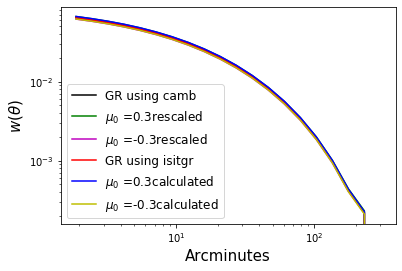

In [24]:
w_GR_R = ccl.correlation(cosmo_GR_R, ell, Cl_nc_GR_R, theta, 
                       corr_type='gg', method='fftlog')
w_1_R = ccl.correlation(cosmo_1_R, ell, Cl_nc_1_R, theta,
                       corr_type='gg', method='fftlog')
w_2_R = ccl.correlation(cosmo_2_R, ell, Cl_nc_2_R, theta, 
                       corr_type='gg', method='fftlog')

w_GR_I = ccl.correlation(cosmo_GR_I, ell, Cl_nc_GR_I, theta, 
                       corr_type='gg', method='fftlog')
w_1_I = ccl.correlation(cosmo_1_I, ell, Cl_nc_1_I, theta,
                       corr_type='gg', method='fftlog')
w_2_I = ccl.correlation(cosmo_2_I, ell, Cl_nc_2_I, theta, 
                       corr_type='gg', method='fftlog')

plt.figure()
plt.loglog(theta_amin, w_GR_R, 'k', label='GR using camb')
plt.loglog(theta_amin, w_1_R, 'g', label='$\mu_0$ ='+str(mu_0[0])+"rescaled")
plt.loglog(theta_amin, w_2_R, 'm', label='$\mu_0$ ='+str(mu_0[3])+"rescaled")

plt.loglog(theta_amin, w_GR_I, 'r', label='GR using isitgr')
plt.loglog(theta_amin, w_1_I, 'b', label='$\mu_0$ ='+str(mu_0[0])+"calculated")
plt.loglog(theta_amin, w_2_I, 'y', label='$\mu_0$ ='+str(mu_0[3])+"calculated")
plt.legend(fontsize=12)
plt.xlabel('Arcminutes', fontsize = 15)
plt.ylabel('$w(\\theta)$', fontsize=15)
plt.show()